In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from functions.conv1fxn import *
from functions.functions_image_training import *
import numpy as np
import tensorflow as tf
import pickle
import h5py
import os.path
import sys
import timeit
%matplotlib inline

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


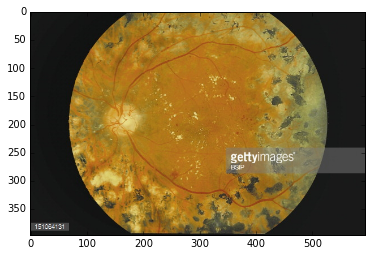

[ 1.  0.  0.]


In [32]:
with h5py.File('data/qualdataZ.h5', 'a') as qd:
    num_images_labels = len(list(qd.keys()))
    label = np.array(qd.get("label1"))
    image = np.array(qd.get("image1"))
plt.imshow(image)
plt.show()
print(label)

In [40]:
############### INPUTS: including bacth size, list of tuples and image dictionary###########################
batch_size = 30
epochs = 1
single_input_shape = (450,450,3)
validation_proportion = 0.05
num_classes = label.shape[0]


In [41]:
target_height,target_width,target_depth = single_input_shape
num_examples = int(num_images_labels / 2)
example_index = list(range(num_examples))
random.shuffle(example_index)
start_of_training = int(validation_proportion*num_examples)
validation_index = example_index[:start_of_training]
training_index = example_index[start_of_training:]
num_val = len(validation_index)
num_train = len(training_index)
num_steps = int(num_train / batch_size)

In [57]:
for step in range(num_steps):
    offset = (step * batch_size) % (num_train) 
    start = offset 
    end = offset + batch_size
    if num_train - end < batch_size:
        end += (num_train % batch_size) # last end is extended to end of training set
    print(start,end)  
    effective_batch_size = end - start
    batch_label = np.zeros((effective_batch_size,num_classes))
    batch_image = np.zeros((effective_batch_size,target_height,target_width,target_depth))
    j = 0
    for i in range(start,end):
        with h5py.File('data/qualdataZ.h5', 'a') as qd:
                batch_raw_image = np.array(qd.get("image"+str(training_index[i])))
                batch_label[j] = np.array(qd.get("label"+str(training_index[i])))
                batch_raw_image = batch_raw_image[:,70:530,:] # consider removing me
                batch_image[j] = imresize(batch_raw_image,(450,450,3))
            
        j+=1
    print(j)

0 30
30
30 60
30
60 90
30
90 120
30
120 150
30
150 180
30
180 210
30
210 240
30
240 270
30
270 300
30
300 330
30
330 360
30
360 390
30
390 420
30
420 450
30
450 480
30
480 510
30
510 540
30
540 570
30
570 600
30
600 630
30
630 660
30
660 690
30
690 720
30
720 750
30
750 780
30
780 810
30
810 840
30
840 870
30
870 900
30
900 930
30
930 960
30
960 990
30
990 1020
30
1020 1050
30
1050 1080
30
1080 1110
30
1110 1140
30
1140 1170
30
1170 1200
30
1200 1230
30
1230 1260
30
1260 1290
30
1290 1320
30
1320 1350
30
1350 1380
30
1380 1410
30
1410 1440
30
1440 1470
30
1470 1500
30
1500 1530
30
1530 1560
30
1560 1590
30
1590 1620
30
1620 1650
30
1650 1680
30
1680 1710
30
1710 1740
30
1740 1770
30
1770 1805
35


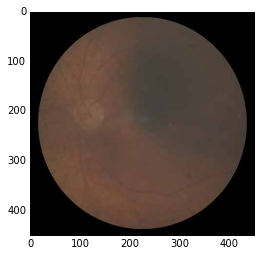

[ 0.  0.  1.]


In [50]:
from scipy.misc import imresize
val_label = np.zeros((num_val,num_classes))
val_image = np.zeros((num_val,target_height,target_width,target_depth))

for i in range(num_val):
    with h5py.File('data/qualdataZ.h5', 'a') as qd:
            val_raw_image = np.array(qd.get("image"+str(validation_index[i])))
            val_label[i] = np.array(qd.get("label"+str(validation_index[i])))
            val_raw_image = val_raw_image[:,70:530,:] # consider removing me
            val_image[i] = imresize(val_raw_image,(450,450,3))
            
plt.imshow(val_image[0].astype('uint8'))
plt.show()
print(val_label[0])

In [51]:
num_steps

60

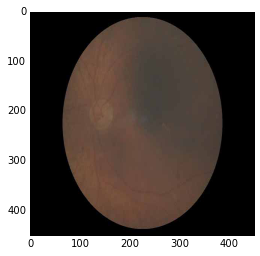

[ 0.  0.  1.]


In [49]:
plt.imshow(val_image[0].astype('uint8'))
plt.show()
print(val_label[0])